In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

tf.random.set_seed(1)

# [Module 77: multi class classification part 1 (preparing data)](https://youtu.be/ZUKz4125WNI?t=7828)

We'll make a neural network to classify different items of clothing

In [3]:
# downlaod data
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Getting a sense of the data

In [6]:
print(train_data[0])
print("---")
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
print(train_data[0].shape, train_labels[0].shape)
# ok so it's 28z28 pixels for input and number representing category for output

(28, 28) ()


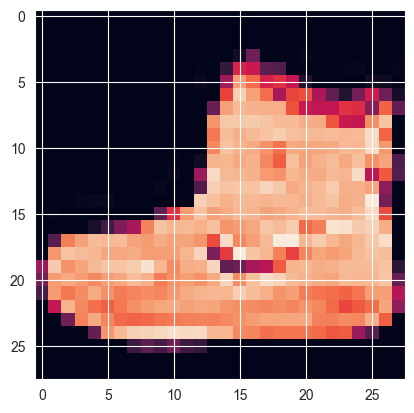

In [8]:
plt.imshow(train_data[0])
plt.show()
print(train_labels[0])

# [Module 78: multi class classification part 2 (becoming one with the data)](https://youtu.be/ZUKz4125WNI?t=7828)

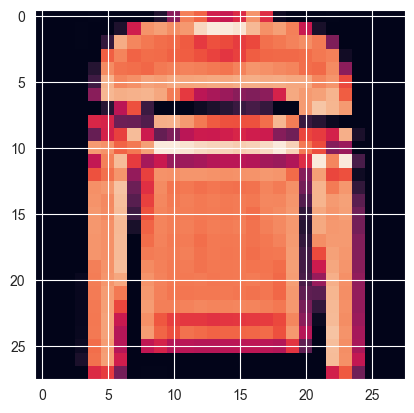

Pullover


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = 5
plt.imshow(train_data[i])
plt.show()
print(class_names[train_labels[i]])


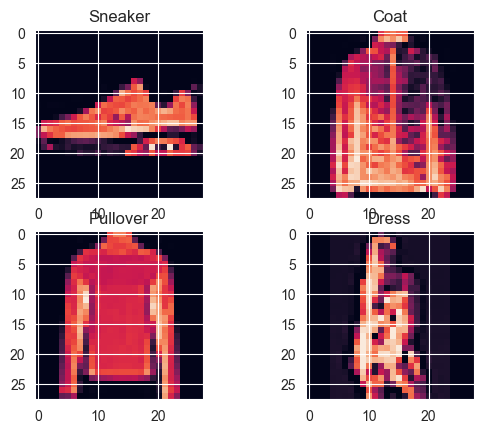

In [17]:
# plot a bunch of random images
import random
fig, ax = plt.subplots(2, 2)
for _ in range(8):
    current = random.choice(range(len(train_data)))
    ax[0][0].imshow(train_data[current])
    ax[0][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[0][1].imshow(train_data[current])
    ax[0][1].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][0].imshow(train_data[current])
    ax[1][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][1].imshow(train_data[current])
    ax[1][1].set_title(class_names[train_labels[current]])

# [Module 78: multi class classification part 3: building multi-class classification model](https://youtu.be/ZUKz4125WNI?t=8893)

1. Input shape: 28x28
2. Output shape: 10 (one per type of clothing)
3. Loss function: tf.keras.losses.CategoricalCrossentropy() if one hot encoded. int => SparseCategoricalCrossentropy()
4. Output layer activation: softmax

In [34]:
# create model
multi_model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multi_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy() only for one hot encoded
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

non_norm_hist = multi_model1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 1s 504us/step - loss: 1.8546 - accuracy: 0.3861 - val_loss: 1.2867 - val_accuracy: 0.5975
Epoch 2/10
1875/1875 [==============================] - 1s 462us/step - loss: 0.9749 - accuracy: 0.6045 - val_loss: 0.9062 - val_accuracy: 0.6189
Epoch 3/10
1875/1875 [==============================] - 1s 471us/step - loss: 0.8820 - accuracy: 0.6314 - val_loss: 0.8901 - val_accuracy: 0.6430
Epoch 4/10
1875/1875 [==============================] - 1s 471us/step - loss: 0.8286 - accuracy: 0.6668 - val_loss: 0.8338 - val_accuracy: 0.6738
Epoch 5/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.7819 - accuracy: 0.6888 - val_loss: 0.7895 - val_accuracy: 0.6916
Epoch 6/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.7807 - accuracy: 0.6898 - val_loss: 0.7979 - val_accuracy: 0.6880
Epoch 7/10
1875/1875 [==============================] - 1s 479us/step - loss: 0.7600 - accuracy: 0.6948 - val_loss: 0.7683 -

# [Module 82 multi-class classification part 4 (improving our model)](https://youtu.be/ZUKz4125WNI?t=9832)

In [28]:
print(train_data.min(), train_data.max())
# we can normalize to get 0-255 to 0-1
normalized_x_train = train_data / 255.0
normalized_x_test = test_data / 255.0
print(normalized_x_train.min(), normalized_x_train.max())

0 255
0.0 1.0


In [37]:
# trying the model with normalized data. Works much better!
multi_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer="Adam",
                     metrics=["accuracy"])

norm_history = multi_model2.fit(normalized_x_train, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 785us/step - loss: 0.5185 - accuracy: 0.8169 - val_loss: 59.3173 - val_accuracy: 0.8318
Epoch 2/10
1875/1875 [==============================] - 1s 717us/step - loss: 0.3849 - accuracy: 0.8608 - val_loss: 68.5867 - val_accuracy: 0.8349
Epoch 3/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.3511 - accuracy: 0.8729 - val_loss: 68.1144 - val_accuracy: 0.8254
Epoch 4/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.3316 - accuracy: 0.8783 - val_loss: 63.2975 - val_accuracy: 0.8414
Epoch 5/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.3138 - accuracy: 0.8840 - val_loss: 75.8367 - val_accuracy: 0.8256
Epoch 6/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.2991 - accuracy: 0.8899 - val_loss: 56.2834 - val_accuracy: 0.8501
Epoch 7/10
1875/1875 [==============================] - 1s 628us/step - loss: 0.2903 - accuracy: 0.8928 - val_loss: 66